1. Avaa Iris-datasetti ja tee sille k-means klusterointi
2. Kokeile KMeans-parametreja: init= ’random’  ja init= ’k-means++’ 
3. Mikä on parametrien ero?
4. Mikä on optimaalinen klusterien lukumäärä k?
5. Palauta jupyter-notebook palautuskansioon kommentoituna

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Seaborn has a method "pairplot" that has some type of clustering built-in

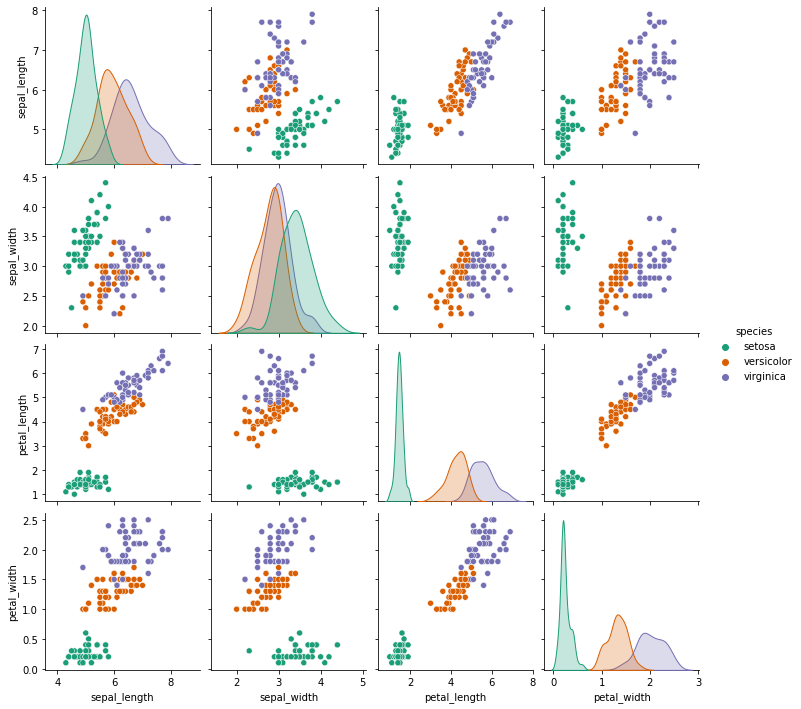

In [340]:
sns.pairplot(iris,hue='species',palette='Dark2')

## Preprocessing

In [2]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
dataset = iris.replace(['setosa', 'versicolor', 'virginica'], [0,1,2])
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = dataset.drop(['species'], axis=1)
Y = dataset['species']
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1, stratify=Y)

print('Labels counts in y: {}'.format(np.bincount(Y)))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [45 45 45]
Labels counts in y_test: [5 5 5]


In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


# Finding the optimal k-value
### This is easier if we'd use Skicit's version of iris-dataset, not Seaborn's

In [10]:
from sklearn import datasets
iris2 = datasets.load_iris()

# Petal length and width assigned to X
X = iris2.data[:, [2, 3]]

In [11]:
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
    
        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2

        sse.append(curr_sse)
    return sse

In [12]:
calculate_WSS(X, 3)

[550.8953333333335, 86.39021984551391, 31.37135897435897]

## Due to Seaborn's version if iris-dataset already being in pd.DataFrame format, we need to seperate data manually

In [ ]:
test1 = (i for i in X['petal_length'])
test2 = (j for j in X['petal_width'])

point = []

for i,j in zip(test1,test2):
    point.append([i,j])

X = np.array(point)
#print(point)

In [9]:
calculate_WSS(X, 3)

[550.8953333333335, 86.39021984551391, 31.37135897435897]

## Finding the optimal/ideal k value for kmeans

### The elbow method

- Within-Cluster-Sum of Squared Errors sounds a bit complex. Let’s break it down:
The Squared Error for each point is the square of the distance of the point from its representation i.e. its predicted cluster center.
- The WSS score is the sum of these Squared Errors for all the points.
- Any distance metric like the Euclidean Distance or the Manhattan Distance can be used.

### The silhouette method

In [13]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for i in range(1,21):
    kmeans = KMeans(n_clusters=i).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))
    
sil = np.array(sil)
plt.plot(ideal_k[:,0],ideal_k[:,1])
plt.show()

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

# Comparing kmeans init values "random" and "k-means++"

- K-means++ is a biased random sampling that prefers points that are farther from each other, and avoids close points. 

- Random initialization may be unlucky and choose nearby centers.

So in theory, k-means++ should require fewer iterations and have a higher chance of finding the global optimum.

-550.8953333333335
-86.39021984551391
-31.37135897435897
-19.465989010989013
-14.130893864755931
-11.057257664362929
-9.558716767666581
-7.727404401154404
-6.8001107309854145
-6.109810134310137


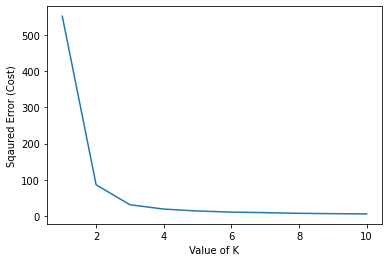

-550.8953333333335
-86.39021984551391
-31.37135897435897
-19.48300089968511
-13.916908757908757
-11.057257664362929
-9.209557208237982
-7.615402244955951
-6.537997301930807
-5.528148730354613


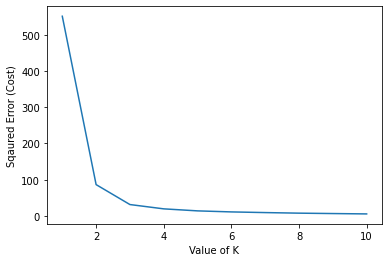

In [15]:
ideal_k = []
for i in range(1,11):
    est_kmeans = KMeans(n_clusters=i, init='random')
    est_kmeans.fit(X)
    
    print(est_kmeans.score(X))
    
    ideal_k.append([i,est_kmeans.inertia_])

ideal_k = np.array(ideal_k)

plt.plot(ideal_k[:,0],ideal_k[:,1])
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()

ideal_k = []
for i in range(1,11):
    est_kmeans = KMeans(n_clusters=i, init='k-means++')
    est_kmeans.fit(X)
    
    print(est_kmeans.score(X))
    
    ideal_k.append([i,est_kmeans.inertia_])

ideal_k = np.array(ideal_k)

plt.plot(ideal_k[:,0],ideal_k[:,1])
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()

### As we can see, the line evens out at the 3 mark.

## So the optimal k value is 3

- Random: -6.109810134310137
- k-Means++: -5.528148730354613

## So k-Means++ is indeed slightly more efficient

# Plotting the clustering

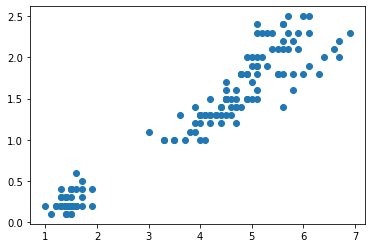

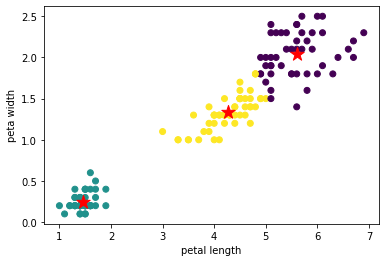

In [368]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)

centroids = kmeans.cluster_centers_

#storing centroids and datapoints in list format for plotting
centroid_X=[]
centroid_Y=[]
data_X=[]
data_Y=[]
for x,y in centroids:
    centroid_X.append(x)
    centroid_Y.append(y)

for x,y in X:
    data_X.append(x)
    data_Y.append(y)

# Plot of dataset
plt.scatter(data_X, data_Y)
plt.show()

# Plot of cluster formed dataset along with centroid
plt.scatter(data_X, data_Y, c=kmeans.labels_)
for x, y in zip(centroid_X, centroid_Y):
    plt.scatter(x, y, c="red", marker='*', s=200)
plt.xlabel('petal length')
plt.ylabel('peta width')
plt.show()

### A scatterplot of the pepals

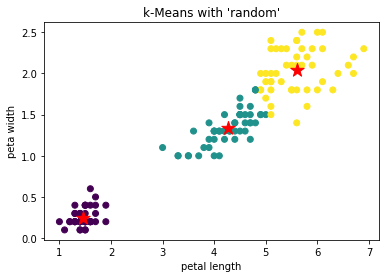

In [385]:
est_kmeans = KMeans(n_clusters=3, init='random')
est_kmeans.fit(X)
pred_kmeans = est_kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=pred_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=200)
plt.title("k-Means with 'random'")
plt.xlabel('petal length')
plt.ylabel('peta width')
plt.show()

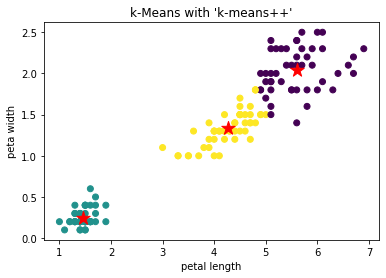

In [386]:
est_kmeans = KMeans(n_clusters=3, init='k-means++')
est_kmeans.fit(X)
pred_kmeans = est_kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=pred_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=200)
plt.title("k-Means with 'k-means++'")
plt.xlabel('petal length')
plt.ylabel('peta width')
plt.show()

In [170]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape

(10, 4)

In [388]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, labels)

0.3333333333333333

In [390]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Kernelized k-means is implemented in Scikit-Learn within the SpectralClustering estimator. 

It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm:

c:\users\eriko\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


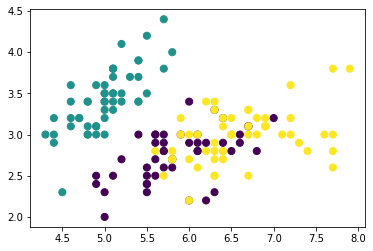

In [391]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(dataset['sepal_length'], dataset['sepal_width'], c=labels,
            s=50, cmap='viridis');

In [393]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(point, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    print(rng)
    i = rng.permutation(X.shape[0])[:n_clusters]#+ 0.0
    print(i)
    centers = point[i:]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(point, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([point[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X['sepal_length'], X['sepal_width'], c=labels,
            s=50, cmap='viridis');

RandomState(MT19937)
[  6   3 113  12]


TypeError: only integer scalar arrays can be converted to a scalar index